In [2]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, ifft

In [11]:
# path = "../Austin_data/Austin_endtidal/"
# txt_files = [file for file in os.listdir(path) if file.endswith('.txt')]
# print(txt_files)
# path = "../Austin_data/Austin_endtidal/BOLD_O2_only_edit.txt"
path = "../../HMRI/Data/Austin_endtidal/BOLD_O2_only_edit.txt"
# path = '/home/asophonsri/Dropbox/HMRI/Data/Austin_endtidal/BOLD_O2_only_edit.txt'
print(path)

../../HMRI/Data/Austin_endtidal/BOLD_O2_only_edit.txt


../../HMRI/Data/Austin_endtidal/BOLD_O2_only_edit.txt


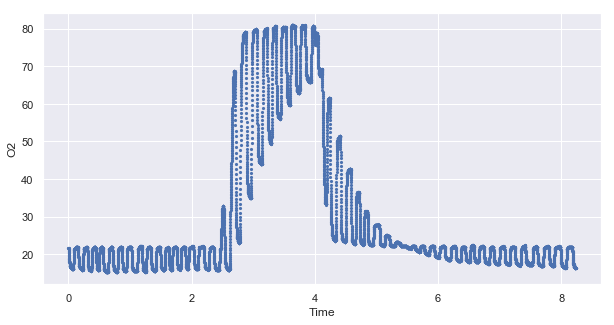

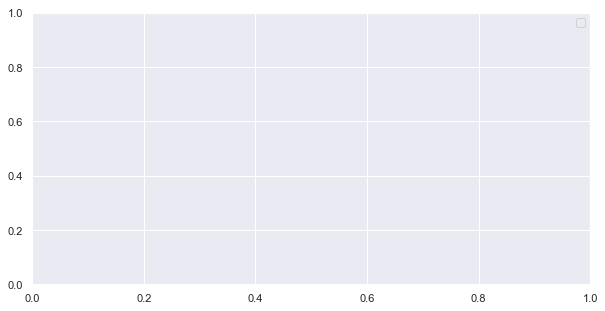

In [12]:
sns.set(rc={'figure.figsize':(10,5)})

# for file in txt_files:
#     f_path = path+file
if path:
    f_path = path
    df = pd.read_csv(f_path, sep='\t', names=['Time', 'O2', 'CO2', 'thrw', 'away'], usecols=['Time', 'O2', 'CO2'], index_col=False)
    print(f_path)
    
    sns.scatterplot(x='Time', y='O2', data=df, linewidth=0, s=10)
    high_CO2 = signal.find_peaks(df.CO2, prominence=2)
#     sns.lineplot(x='Time', y='O2', data=df.iloc[high_CO2[0]], linewidth=4, color='r')
    low_CO2 = signal.find_peaks(df.CO2.apply(lambda x: x*-1), prominence=2)
#     sns.lineplot(x='Time', y='O2', data=df.iloc[low_CO2[0]], linewidth=4, color='g')
    plt.show()
    
    N = len(df)
#    T = 1.5 # given through json file (TR)
    T = df.Time[1] # time between each data point
    O2_x = np.linspace(0.0, N*T, N)
    
    O2_xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    O2_yf = fft(df.O2)
    O2_w = signal.blackman(N)
    O2_ywf = fft(df.O2 * O2_w)
    
#     plt.semilogx(O2_xf[1:N//2], 2.0/N * np.abs(O2_yf[1:N//2]), '-b')
#     plt.semilogx(O2_xf[1:N//2], 2.0/N * np.abs(O2_ywf[1:N//2]), '-r')
    plt.legend(['FFT', 'FFT w. window'])
    plt.show()
    
#     sns.scatterplot(x='Time', y='O2', data=df, linewidth=0, s=10)
#     high_O2 = signal.find_peaks(df.O2, prominence=2)
#     sns.lineplot(x='Time', y='O2', data=df.iloc[high_O2[0]], linewidth=4, color='r')
#     low_O2 = signal.find_peaks(df.O2.apply(lambda x: x*-1), prominence=2)
#     sns.lineplot(x='Time', y='O2', data=df.iloc[low_O2[0]], linewidth=4, color='g')
#     plt.show()
    
    print()

In [13]:
# data_path = '/home/ke/Desktop/Data/austin_gating/RESPData_epi_0717201915_40_02_368'
# data_path = '/home/ke/Desktop/Data/austin_gating/RESPData_epi_0717201915_49_05_300'
data_path = '../../HMRI/Data/austin_gating/RESPData_epi_0717201915_49_05_300'
# data_path = '/home/asophonsri/Dropbox/HMRI/Data/austin_gating/RESPData_epi_0717201915_49_05_300'

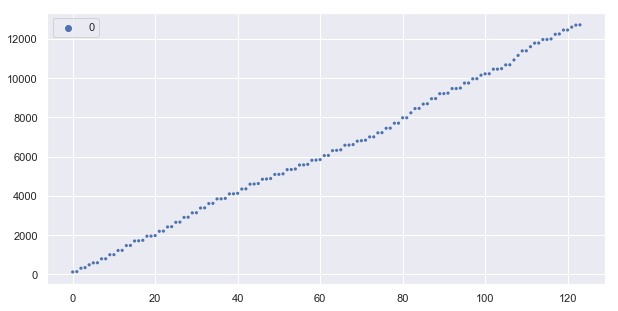

124


In [14]:
# trig_path = '/home/ke/Desktop/Data/austin_gating/RESPTrig_epi_0717201915_40_02_368'
# trig_path = '/home/ke/Desktop/Data/austin_gating/RESPTrig_epi_0717201915_49_05_300'
trig_path = '../../HMRI/Data/austin_gating/RESPTrig_epi_0717201915_49_05_300'
# trig_path = '/home/asophonsri/Dropbox/HMRI/Data/austin_gating/RESPTrig_epi_0717201915_49_05_300'
trig_series = pd.read_csv(trig_path, header=None)
sns.scatterplot(data=trig_series, linewidth=0, s=10)
plt.show()
print(len(trig_series))

In [15]:
sns.scatterplot(x = np.linspace(0,.04/60*len(d_series),len(d_series))[:400], y = d_series[0][:400], linewidth=0, s=10)
plt.show()

NameError: name 'd_series' is not defined

In [16]:
data_series = pd.read_csv(data_path, header=None)
print(len(data_series))
resp_tStep = .04/60
print("Bellow Record Time Step:", resp_tStep)

# d_series = data_series[::len(data_series)//324]
d_series = data_series


12771
Bellow Record Time Step: 0.0006666666666666666


In [17]:
d_series.head()

,0
0,2904
1,2888
2,2874
3,2860
4,2844


O2 time-step:  0.0006666666666666666
12771


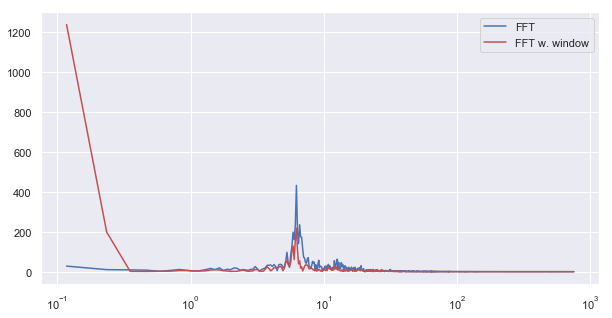

In [18]:
N = len(d_series)
#    T = 1.5 # given through json file (TR)
#T = df.Time[1] # time between each data point\
# Sampling rate in fracs of min
T = .04/60
print("O2 time-step: ", T)
print(N)
x = np.linspace(0.0, N*T, N)

breath_xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
breath_yf = fft(d_series[0])
breath_w = signal.blackman(N)
breath_ywf = fft(d_series[0] * breath_w)

plt.semilogx(breath_xf[1:N//2], 2.0/N * np.abs(breath_yf[1:N//2]), '-b')
plt.semilogx(breath_xf[1:N//2], 2.0/N * np.abs(breath_ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.show()

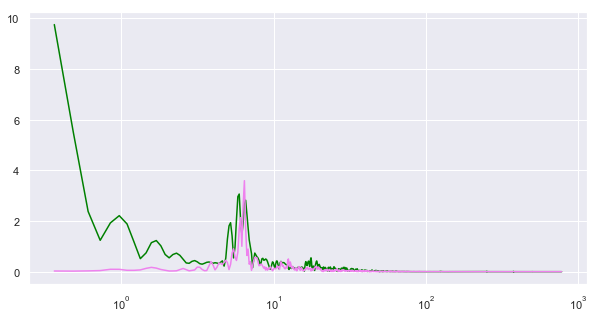

In [19]:
starting_point = 3
plt.semilogx(O2_xf[starting_point:N//2], 2.0/N * np.abs(O2_ywf[starting_point:N//2]), color='green')
plt.semilogx(O2_xf[starting_point:N//2], .033/N * np.abs(breath_ywf[starting_point:N//2]), color='violet')
plt.show()

[0.         0.12148511 0.24297022 0.36445533 0.48594044]
[0.         0.1174812  0.23496241 0.35244361 0.46992481]
15437 12771 7718


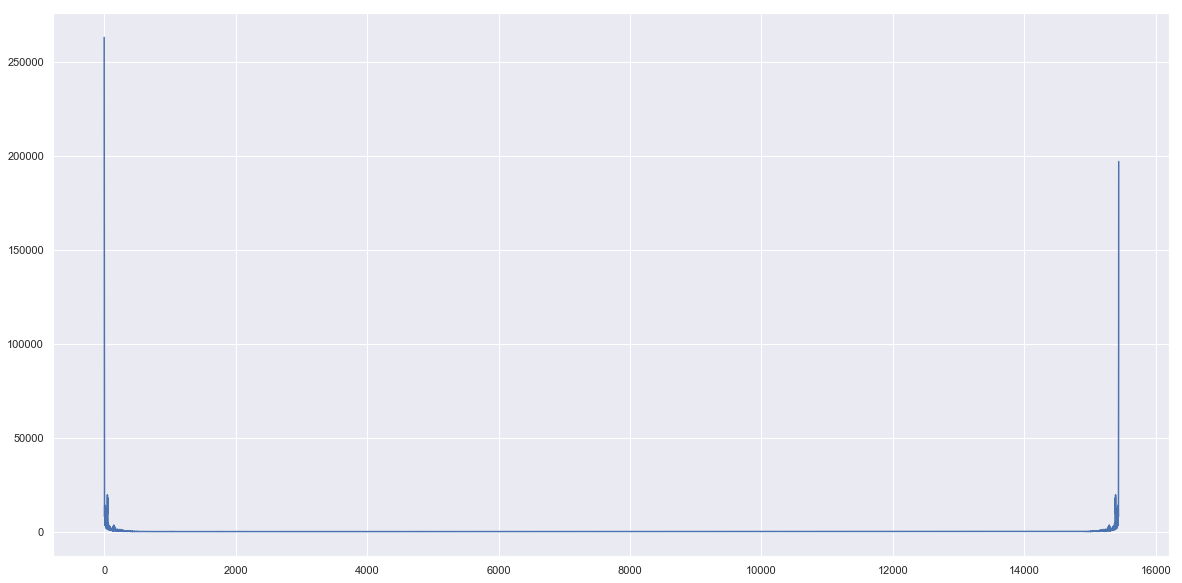

In [20]:
print(O2_xf[0:5])
print(breath_xf[0:5])
print(len(O2_ywf), len(breath_ywf), len(O2_xf))
plt.figure(figsize=(20,10))
plt.plot(np.abs(O2_ywf))

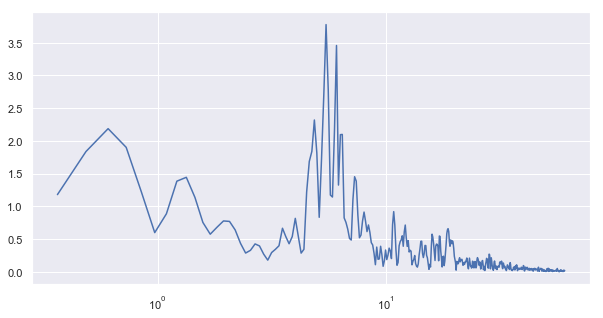

In [21]:
#lets try by assuming these two are perfectly aligned
Power_spectra = 2/N*O2_ywf[starting_point:N//2] - .05/N*breath_ywf[starting_point:N//2]
plt.semilogx(O2_xf[starting_point:500], np.abs(Power_spectra[starting_point:500]))
#O2_xf and Power_spectra do not have the same shape!!

In [22]:
invertible = np.concatenate((2/N*(O2_ywf[0:3]), Power_spectra))
invertible = np.concatenate((invertible,invertible[::-1]))
len(invertible)

12770

/Users/borainbow/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


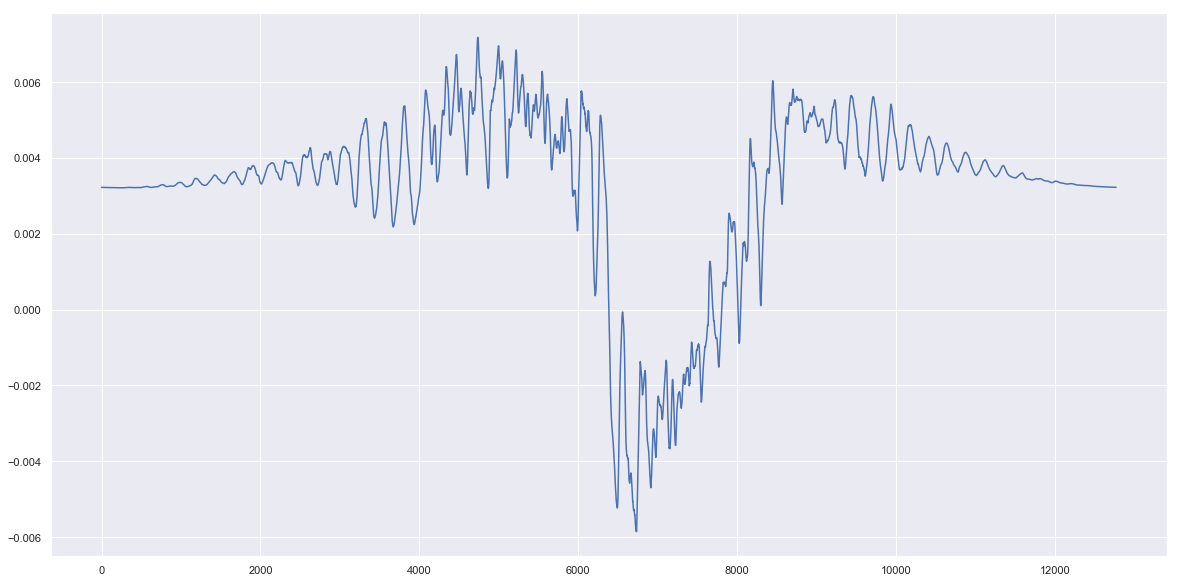

In [23]:
cleaned = ifft(invertible)
plt.figure(figsize=(20,10))
plt.plot(cleaned)

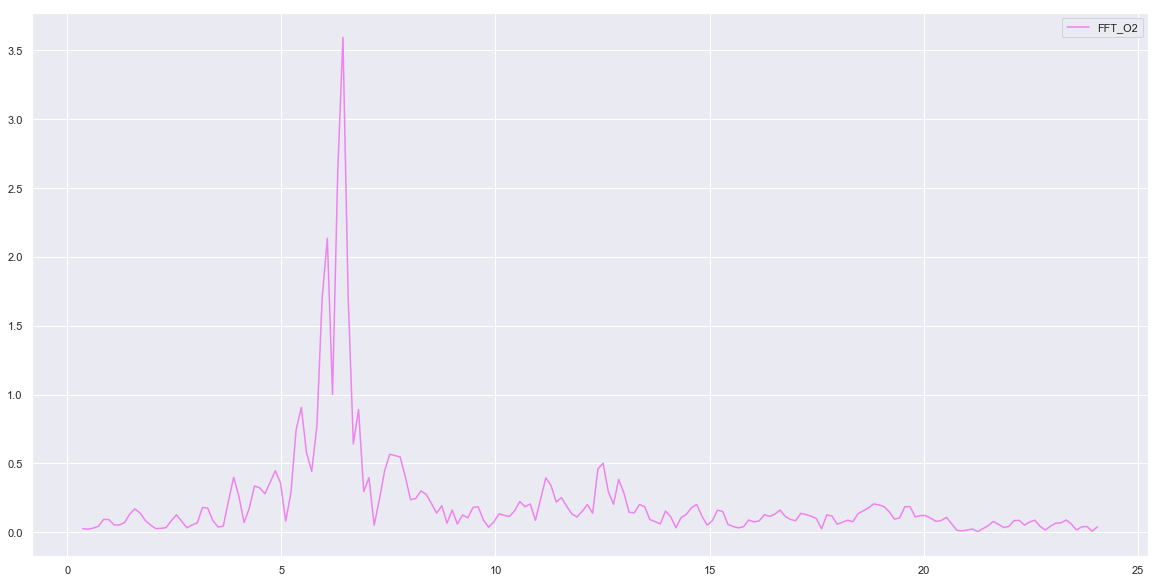

In [24]:
#we need to figure out a way to filter breathing data, the transform is too messy
plt.figure(figsize=(20,10))
# plt.plot(O2_xf[starting_point:N//64], 2.0/N * np.abs(O2_ywf[starting_point:N//64]), color='green')
plt.plot(O2_xf[starting_point:N//64], .033/N * np.abs(breath_ywf[starting_point:N//64]), color='violet')
plt.legend(['FFT_O2', 'FFT_breath'])
plt.show()

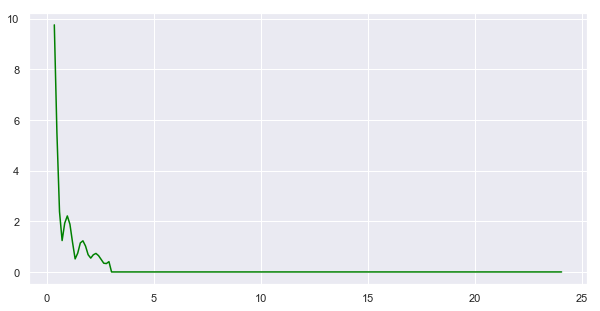

In [25]:
filtered = np.copy(O2_ywf)
for i,t in enumerate(O2_xf):
    if (t >=3 and t<=50):
        filtered[i] = 0
        filtered[-i] = 0

plt.plot(O2_xf[starting_point:N//64], 2.0/N * np.abs(filtered[starting_point:N//64]), color='green')

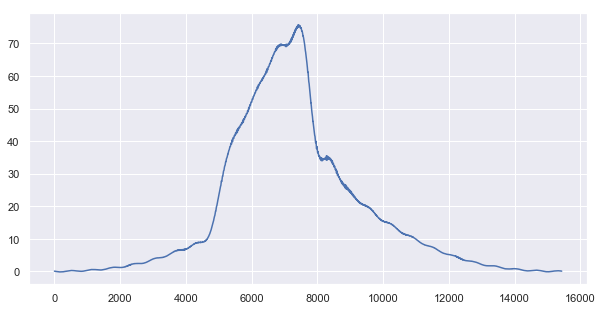

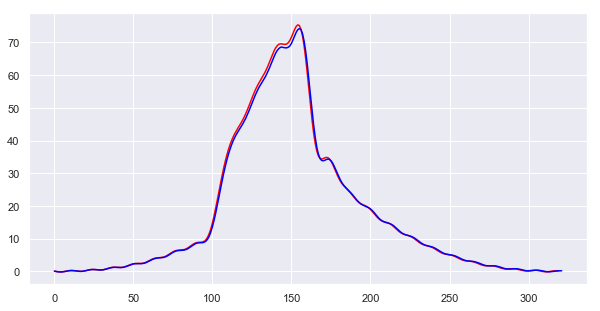

In [38]:
manual_cleaned = ifft(filtered)
plt.plot(manual_cleaned)
plt.show()

manual_cleaned3 = signal.resample(manual_cleaned, 320)
manual_cleaned4 = signal.decimate(manual_cleaned, len(manual_cleaned)//320)
plt.plot(manual_cleaned3, color='red')
plt.plot(manual_cleaned4, color='blue')
plt.show()




In [27]:
import scipy.signal as sg



In [ ]:
filtered2 = sg.symiirorder1(filtered, 1, .3, 0)
plt.plot(O2_xf[starting_point:N//64], 2.0/N * np.abs(filtered2[starting_point:N//64]), color='green')

In [ ]:
IIRCleaned = ifft(filtered2)

In [ ]:
plt.plot(IIRCleaned)

In [ ]:
#proposed filtering technique
#smooth breathing data fourier transform
#take normal distribution .95 area and find its domain
#cut out domain from CO2/O2 data
import scipy.signal as sg
def fourier_trans(t_step, data):
    N = len(data)
    freq_dom = np.linspace(0,1/(2*t_step),N//2)
    power_spectra = fft(data*sg.blackman(N))
    plottable_spectra = (2/N * np.abs(power_spectra))[:N//2]
    return (freq_dom,power_spectra,plottable_spectra)

testF, testP, testS = fourier_trans(.04/60, d_series[0])
plt.figure(figsize=(20,10))

start=0
plt.plot(testP)

In [ ]:
pulsePath = '/home/ke/Desktop/Data/austin_gating/PPGData_epi_0717201915_49_05_300'
pulseDF = pd.read_csv(pulsePath, sep='\n', names=['Pulse'])
    
pulseFreq, pulsePower, pulseDisplay = fourier_trans(.01/60,pulseDF.Pulse)
# oFreq,oPower,oDisplay = fourier_trans(df.Pulse)

plt.figure(figsize=(20,10))
plt.semilogx(pulseFreq, pulseDisplay)
# plt.plot(df.Time)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pulseDF[:500])